In [1]:
# import sys
# !{sys.executable} -m pip install --upgrade zarr
# !{sys.executable} -m pip install --upgrade c-lasso 

from classo import random_data, classo_problem
import zarr
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## Data 

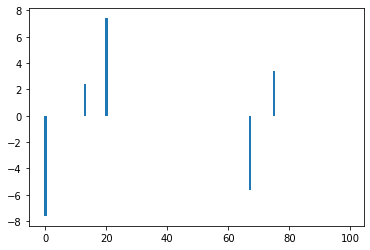

array([ 0, 13, 20, 67, 75])

In [2]:
m, d, d_nonzero, k, sigma = 150, 100, 5, 1, 0.5
(X, C, y), sol = random_data(m, d, d_nonzero, k, sigma, zerosum = True, seed = 0)
plt.bar(range(len(sol)), sol)
plt.show()

np.arange(len(sol))[sol != 0.]

In [3]:
print("lambdamax = ", max(abs(X.T.dot(y))))

lambdamax =  1204.7639353298594


## Problems

In [4]:
problem = classo_problem(X, y+0.5, C= C)
problem.model_selection.PATH = True
problem.model_selection.CV = True
problem.model_selection.StabSel = True
problem.model_selection.LAMfixed = True


problem1 = deepcopy(problem)
problem2 = deepcopy(problem)
problem3 = deepcopy(problem)

problem2.formulation.w = np.array([1.1]*40+ [1.]*(d-40))


problem1.formulation.intercept = True
problem2.formulation.intercept = True
problem3.formulation.intercept = False

In [5]:
y

array([-37.3436899 ,   4.11516041,  -7.8774365 ,   7.20170525,
        18.8866835 , -13.76743268,  14.92984396,   0.16782225,
       -18.07226166, -11.84175036,  10.38056772,   7.78594069,
         1.13125121,   9.21171808,  -8.79585187,   8.47022877,
        -3.61920321,   5.87723385, -12.28054408,   4.6999001 ,
        -7.24172135,  14.27959472,  26.79853182,   1.80967626,
        -4.50777003,  15.3666805 ,  14.07354001,  11.27510505,
        15.32213813,  29.63280639, -36.63869043,  -3.38384341,
        26.51286386,   5.70765923, -13.15532973,   7.65976935,
        -9.54863825,  -5.07053993,   9.05216124,  14.24125395,
       -18.53432645,  -0.08181264,   6.57728152,  -2.52571015,
        10.24655168, -14.21674768,  -4.3108569 ,  12.30122895,
        -1.94446556,  -3.97522268,   2.90156133,  20.87721535,
        -2.28619105,   1.83032833,   8.02157019, -10.3212059 ,
       -12.43384879,  10.26433817,  -6.94147187,   1.87312574,
        -6.96242314,  34.3851273 ,  -0.05678865,  -0.12

### Path 

In [6]:
param = problem1.model_selection.PATHparameters
param.numerical_method = ' '
param.n_active = 20
param.lambdas = np.linspace(1., 1e-3, 50)

In [7]:
param = problem2.model_selection.PATHparameters
param.numerical_method = 'P-PDS'
param.n_active = 0
param.lambdas = np.linspace(1., 1e-1, 50)

In [8]:
param = problem3.model_selection.PATHparameters
param.numerical_method = 'DR'
param.n_active = 0
param.lambdas = np.linspace(1., 1e-1, 20)

### Cross validation 

In [9]:
param = problem1.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 5
param.oneSE = True
param.lambdas = np.linspace(1., 1e-3, 80)

In [10]:
param = problem2.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 7
param.oneSE = False
param.lambdas = np.linspace(1., 1e-3, 80)

In [11]:
param = problem3.model_selection.CVparameters
param.seed = 2
param.numerical_method = 'P-PDS'
param.Nsubset = 3
param.oneSE = True
param.lambdas = np.linspace(1., 1e-1, 20)

### Stability Selection

In [12]:
param = problem1.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'first'
param.B = 50
param.q = 10
param.percent_nS = 0.5
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.7 
param.threshold_label = 0.2

In [13]:
param = problem2.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'max'
param.B = 70
param.q = 20
param.percent_nS = 0.8
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.5 
param.threshold_label = 0.2

In [14]:
param = problem3.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'lam'
param.B = 50
param.q = 1000
param.percent_nS = 0.4
param.lamin = 1.
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.8
param.threshold_label = 0.2

### Lambda fixed 

In [15]:
param = problem1.model_selection.LAMfixedparameters
param.numerical_method = 'P-PDS'
param.lam = 'theoretical'
param.true_lam = True

In [16]:
param = problem2.model_selection.LAMfixedparameters
param.numerical_method = 'DR'
param.lam = 0.1
param.true_lam = False

In [17]:
param = problem3.model_selection.LAMfixedparameters
param.numerical_method = ' '
param.lam = 0.
param.true_lam = True

## R1

In [18]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = False

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = P-PDS
     rescaled lam : True
     threshold = 0.208
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



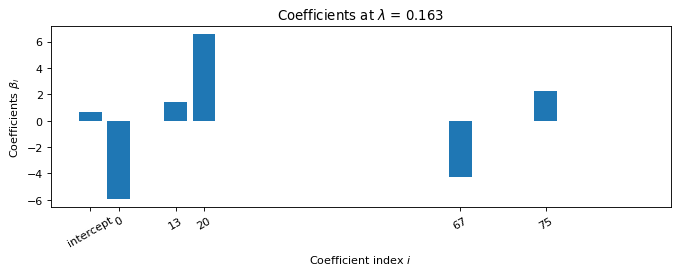

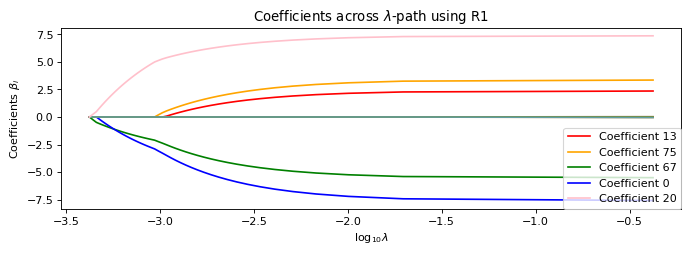

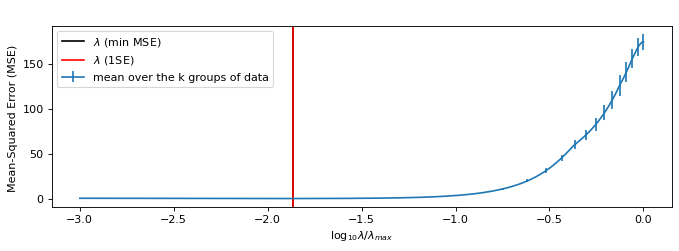

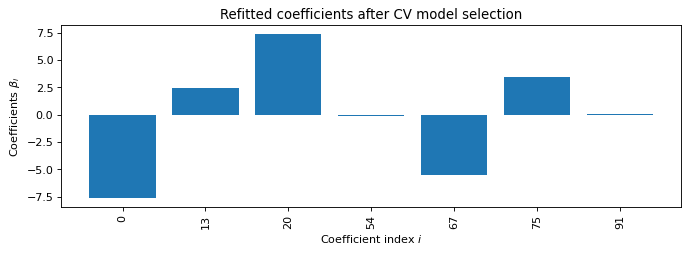

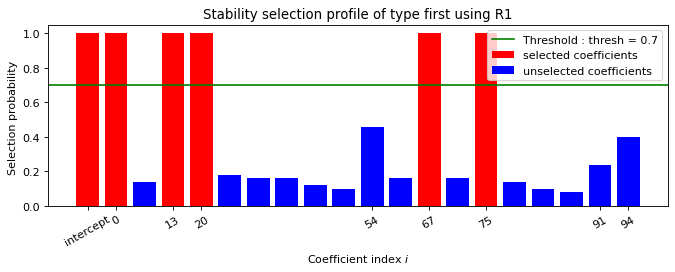

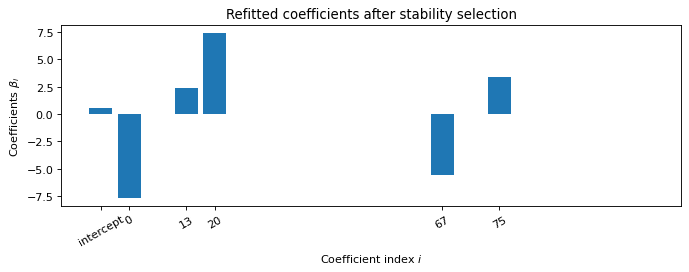


 LAMBDA FIXED : 
   Selected variables :  intercept    0    13    20    67    75    
   Running time :  0.011s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.027s

 CROSS VALIDATION : 
 Intercept : 0.5261472623567112
   Selected variables :  0    13    20    54    67    75    91    
   Running time :  0.528s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    13    20    67    75    
   Running time :  0.615s

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.231
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : P-PDS
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     

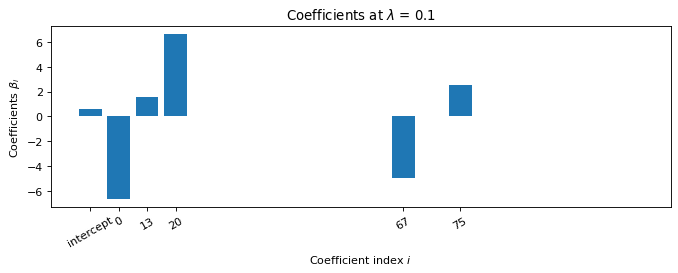

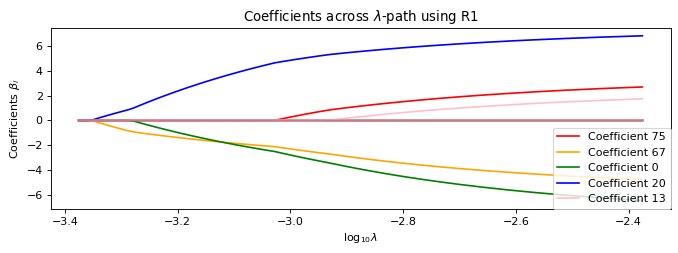

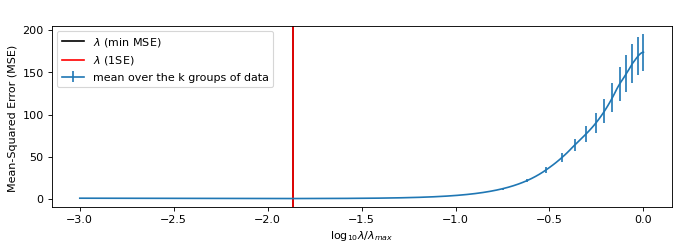

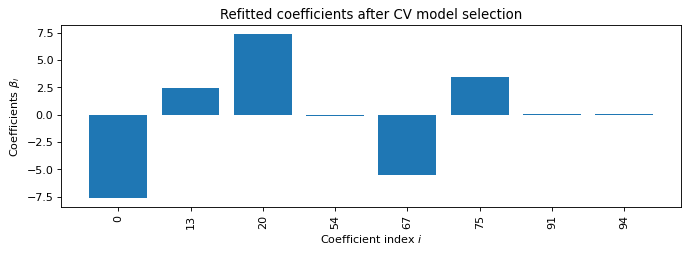

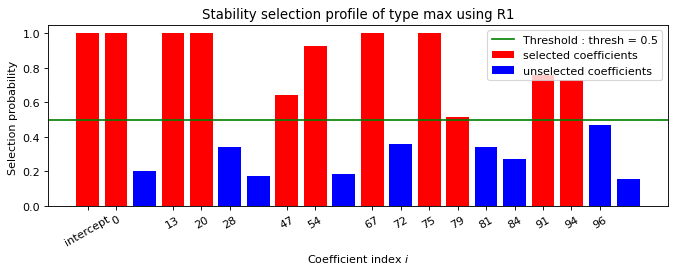

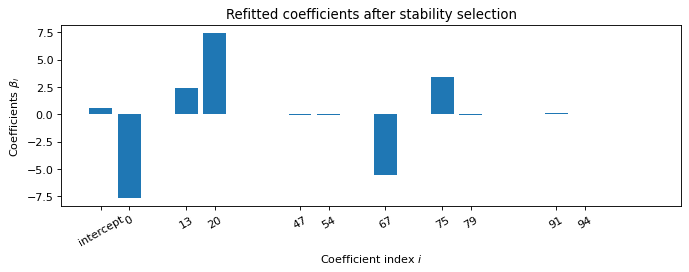


 LAMBDA FIXED : 
   Selected variables :  intercept    0    13    20    67    75    
   Running time :  0.17s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.629s

 CROSS VALIDATION : 
 Intercept : 0.5292909275637349
   Selected variables :  0    13    20    54    67    75    91    94    
   Running time :  0.777s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    13    20    47    54    67    75    79    91    94    
   Running time :  1.156s

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.334
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : P-PDS
     one-SE method : True
     Nsubset = 3
     lamin = 0.1
     Nlam = 20
 
 
STABILITY SE

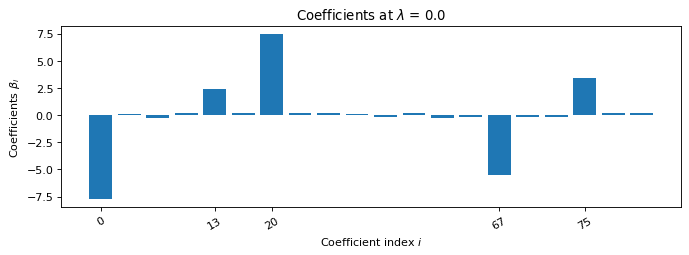

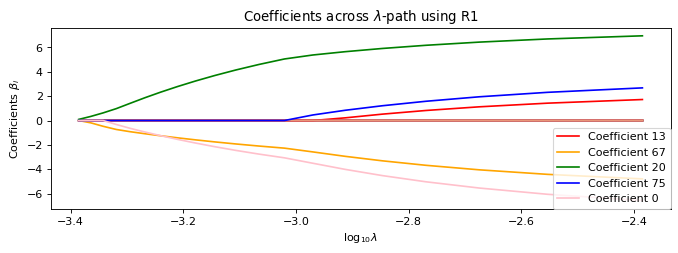

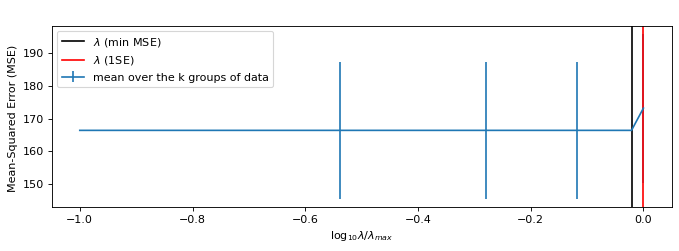

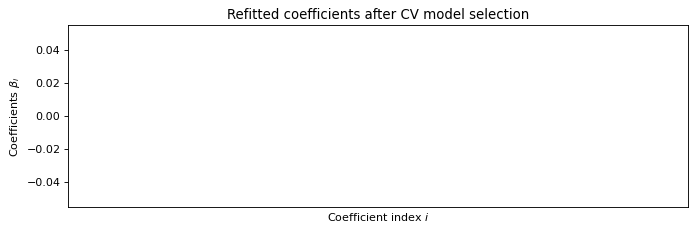

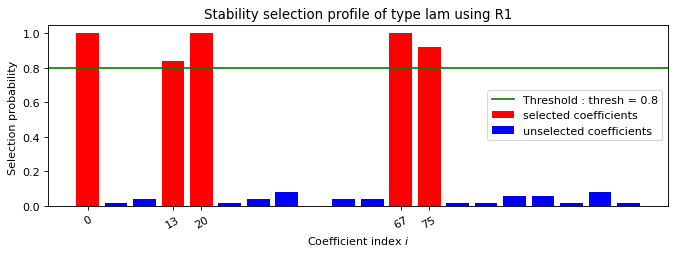

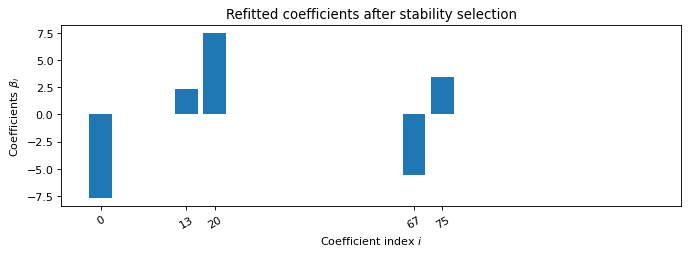


 LAMBDA FIXED : 
   Selected variables :  0    13    20    67    75    
   Running time :  0.018s

 PATH COMPUTATION : 
   Running time :  4.156s

 CROSS VALIDATION : 
   Selected variables :  
   Running time :  0.156s

 STABILITY SELECTION : 
   Selected variables :  0    13    20    67    75    
   Running time :  0.515s



In [19]:
problem1.solve()
print(problem1)
print(problem1.solution)

problem2.solve()
print(problem2)
print(problem2.solution)


problem3.solve()
print(problem3)
print(problem3.solution)


## Reset the numerical methods 

In [20]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## R2

In [21]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = False

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = P-PDS
     rescaled lam : True
     threshold = 0.208
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



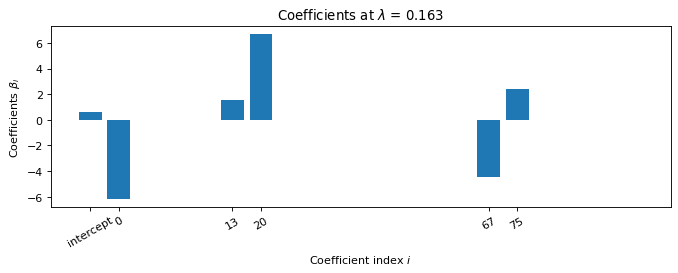

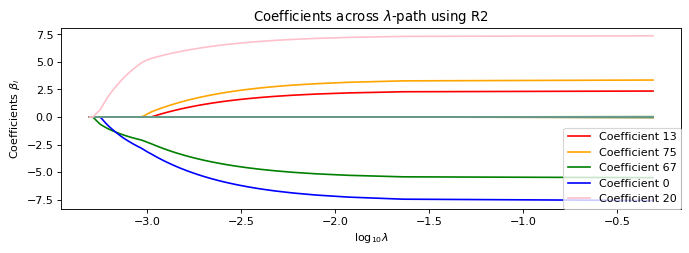

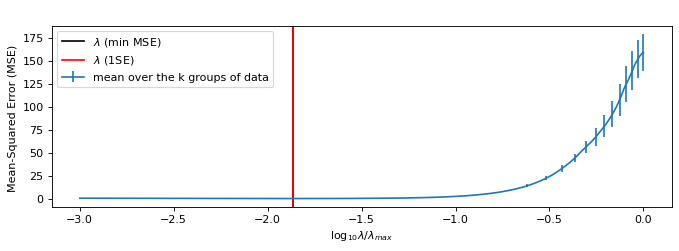

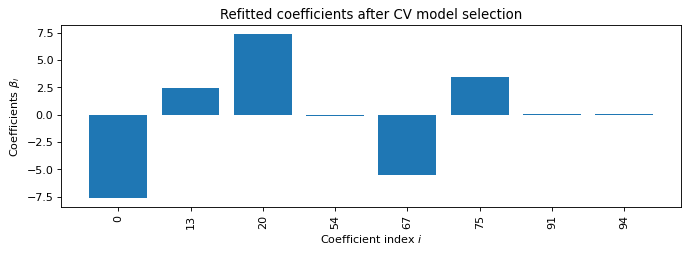

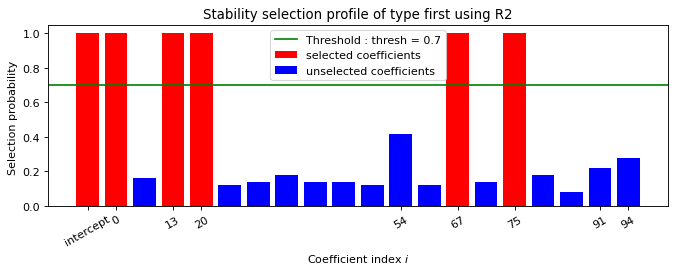

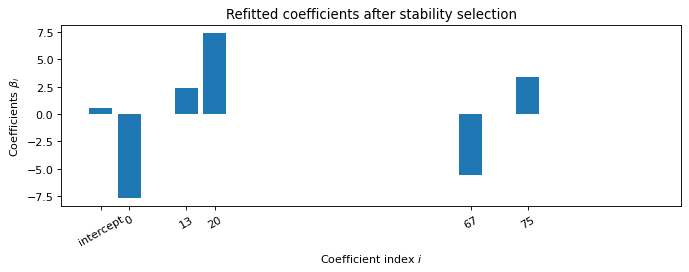


 LAMBDA FIXED : 
   Selected variables :  intercept    0    13    20    67    75    
   Running time :  0.075s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.307s

 CROSS VALIDATION : 
 Intercept : 0.5292909275637349
   Selected variables :  0    13    20    54    67    75    91    94    
   Running time :  1.682s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    13    20    67    75    
   Running time :  2.792s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.231
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : P-PDS
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lam

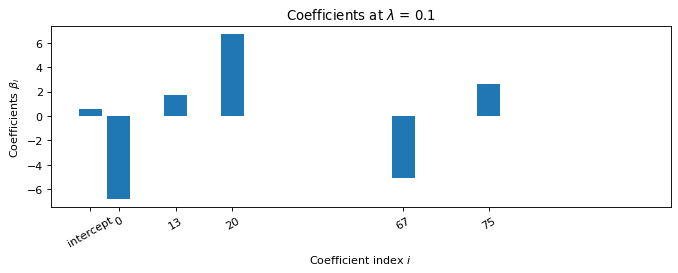

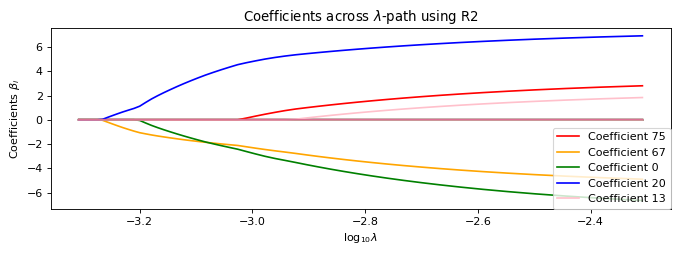

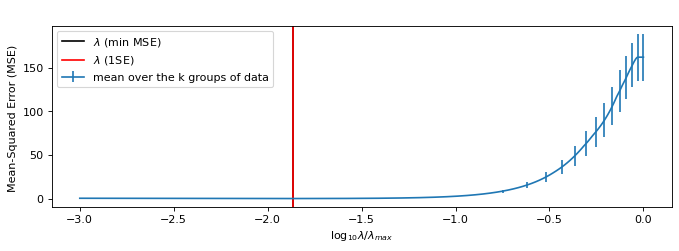

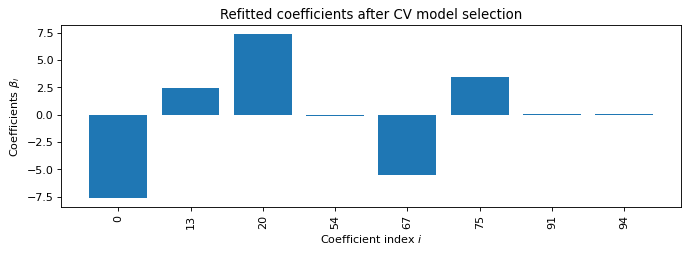

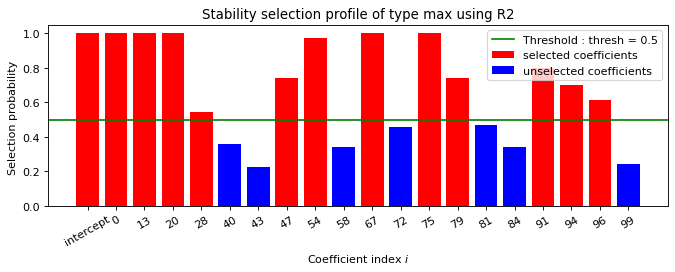

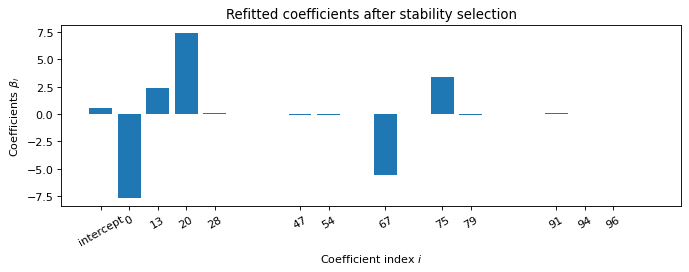


 LAMBDA FIXED : 
   Selected variables :  intercept    0    13    20    67    75    
   Running time :  0.218s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  1.187s

 CROSS VALIDATION : 
 Intercept : 0.5292909275637349
   Selected variables :  0    13    20    54    67    75    91    94    
   Running time :  1.975s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    13    20    28    47    54    67    75    79    91    94    96    
   Running time :  6.048s

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.334
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : P-PDS
     one-SE method : True
     Nsubset = 3
     lamin = 0.1
     Nlam = 

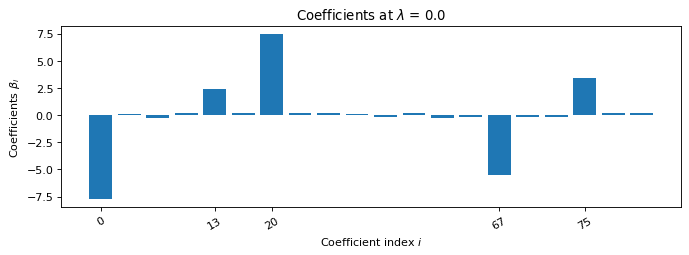

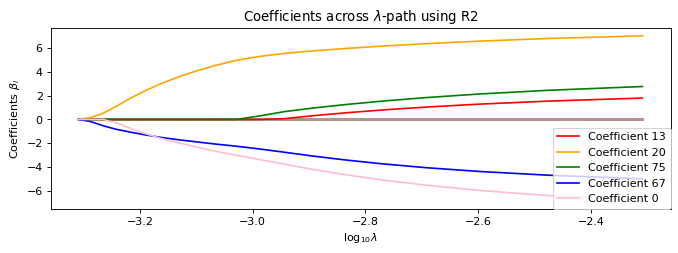

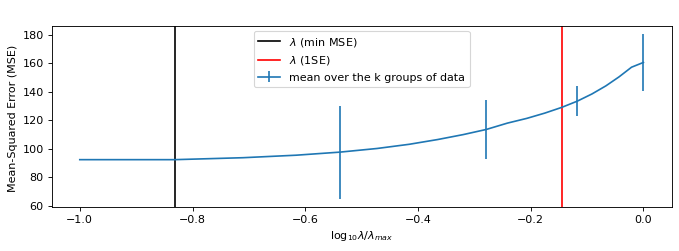

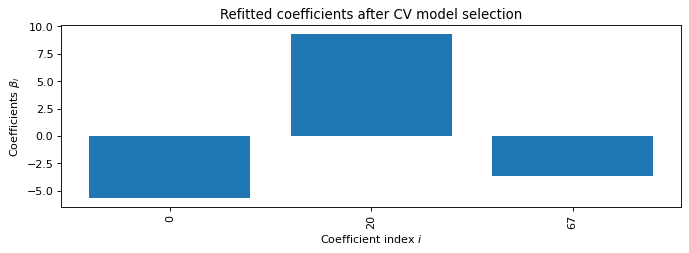

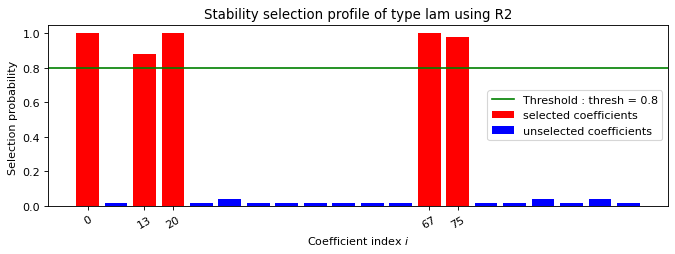

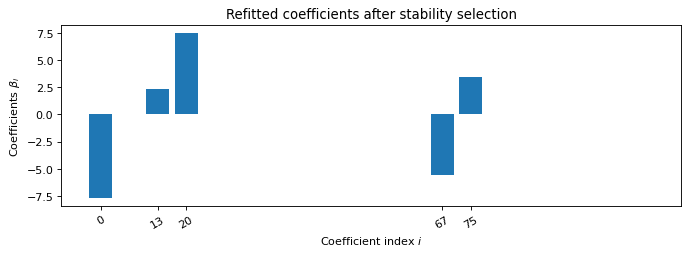


 LAMBDA FIXED : 
   Selected variables :  0    13    20    67    75    
   Running time :  0.033s

 PATH COMPUTATION : 
   Running time :  5.374s

 CROSS VALIDATION : 
   Selected variables :  0    20    67    
   Running time :  0.68s

 STABILITY SELECTION : 
   Selected variables :  0    13    20    67    75    
   Running time :  1.505s



In [22]:
problem1.solve()
print(problem1)
print(problem1.solution)
# plt.plot(problem1.solution.PATH.LAMBDAS, problem1.solution.PATH.BETAS[:, 0])
# plt.show()

problem2.solve()
print(problem2)
print(problem2.solution)


problem3.solve()
print(problem3)
# problem3.solution.CV.graphic(se_max = None)
print(problem3.solution)



## Reset the numerical methods 

In [23]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'


problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '

## R3

In [24]:
problem1.formulation.concomitant = True
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = False
problem3.formulation.classification = False

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.208
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



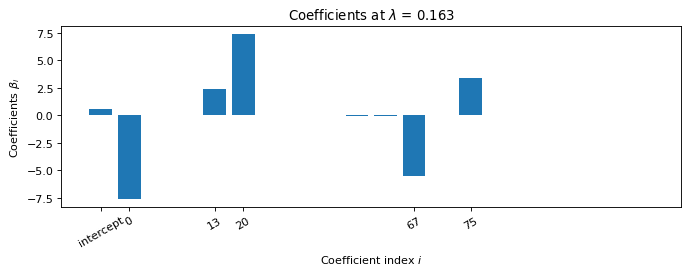

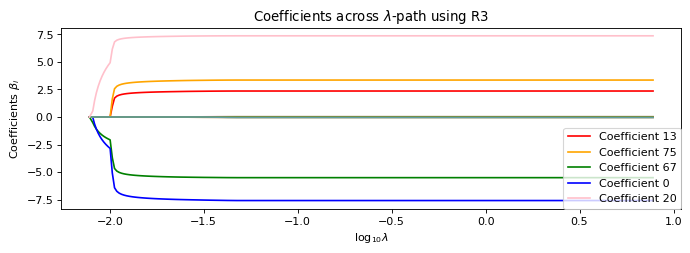

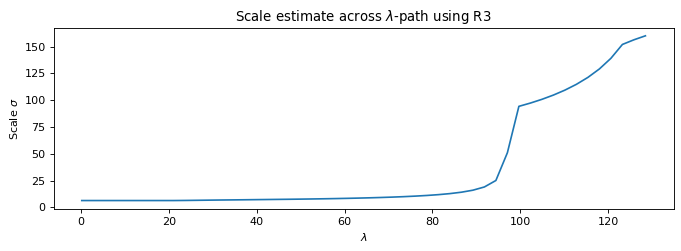

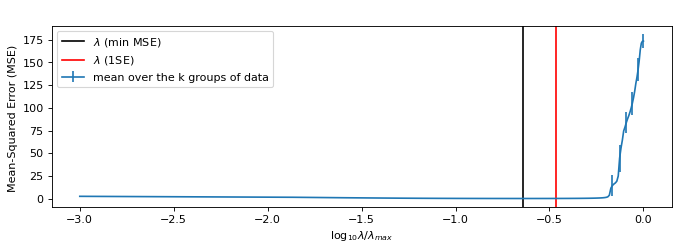

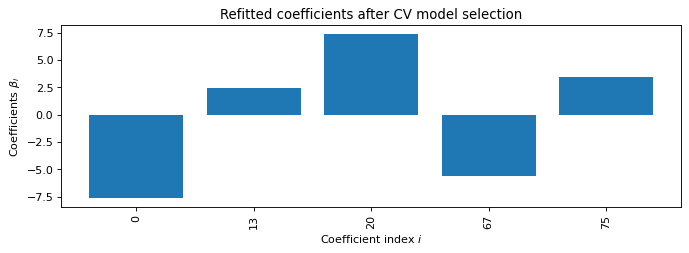

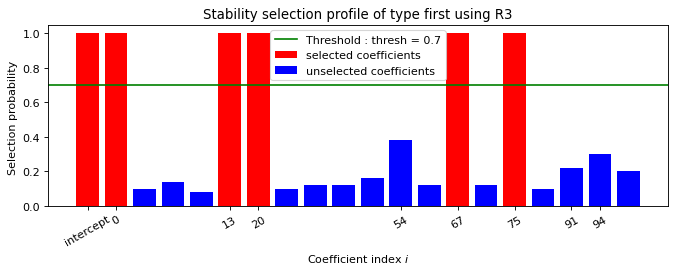

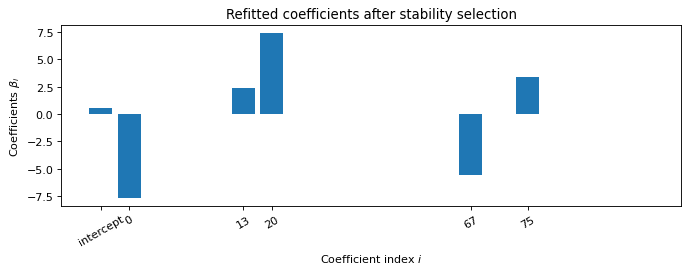


 LAMBDA FIXED : 
   Sigma  =  0.723
   Selected variables :  intercept    0    13    20    67    75    
   Running time :  0.033s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.046s

 CROSS VALIDATION : 
 Intercept : 0.5300956361927617
   Selected variables :  0    13    20    67    75    
   Running time :  1.226s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    13    20    67    75    
   Running time :  0.953s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.231
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
    

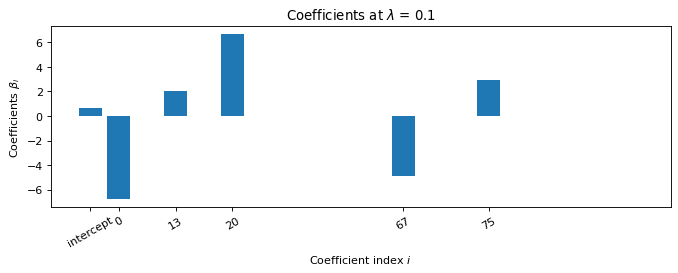

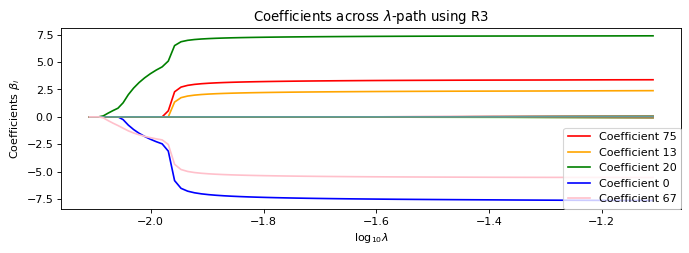

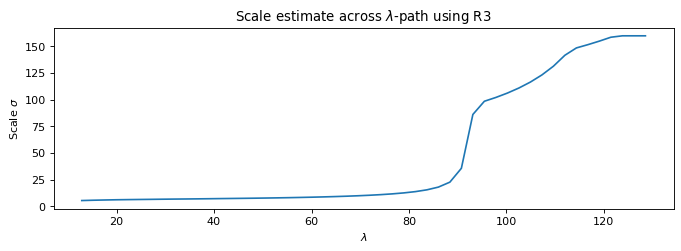

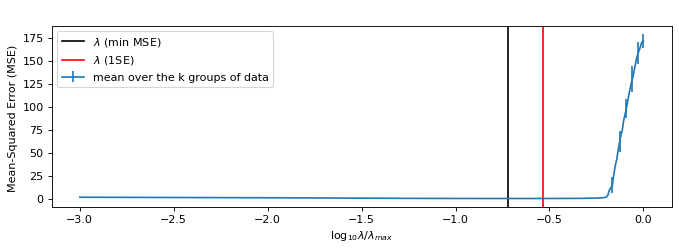

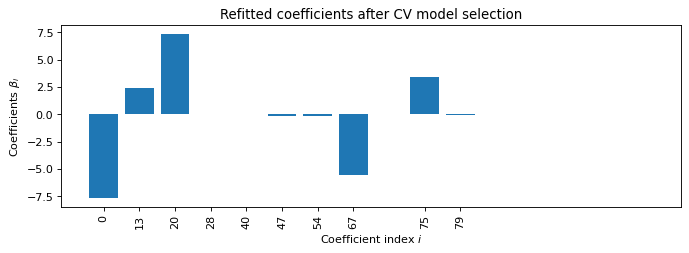

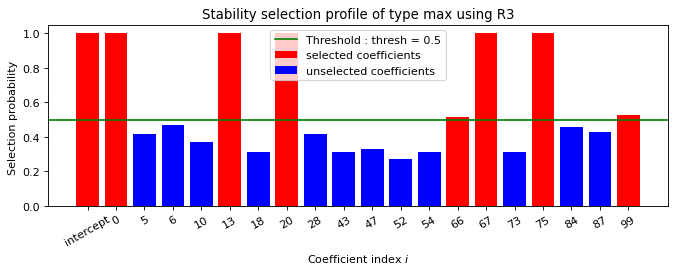

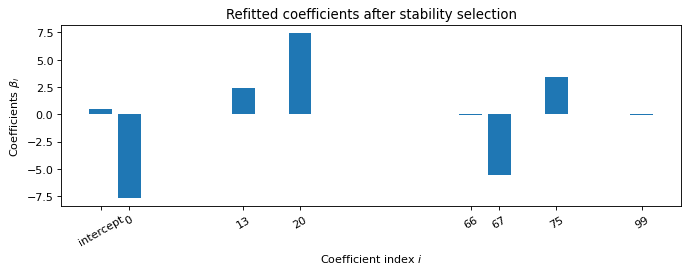


 LAMBDA FIXED : 
   Sigma  =  5.252
   Selected variables :  intercept    0    13    20    67    75    
   Running time :  43.469s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.082s

 CROSS VALIDATION : 
 Intercept : 0.5219160444417483
   Selected variables :  0    13    20    28    40    47    54    67    72    75    79    81    84    91    94    96    
   Running time :  1.427s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    13    20    66    67    75    99    
   Running time :  16.132s

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.334
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
    

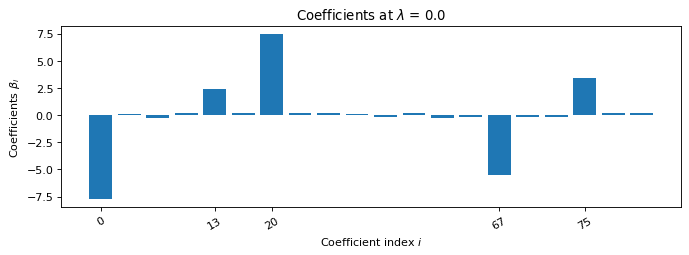

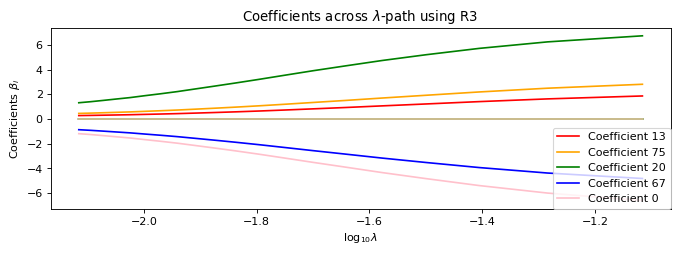

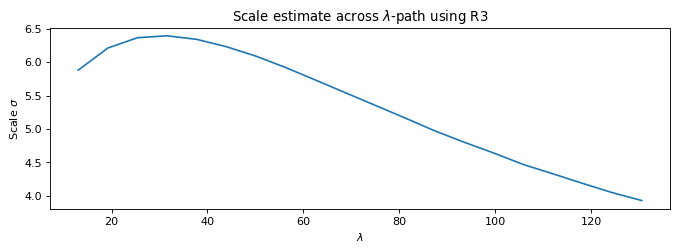

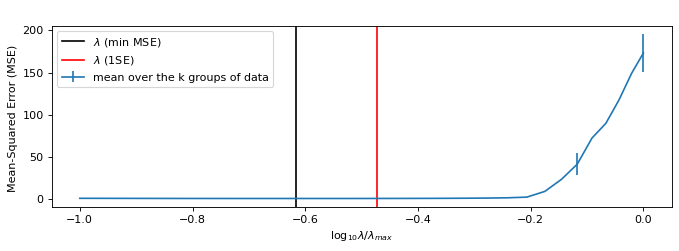

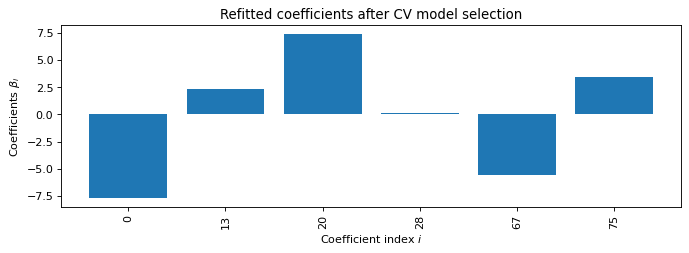

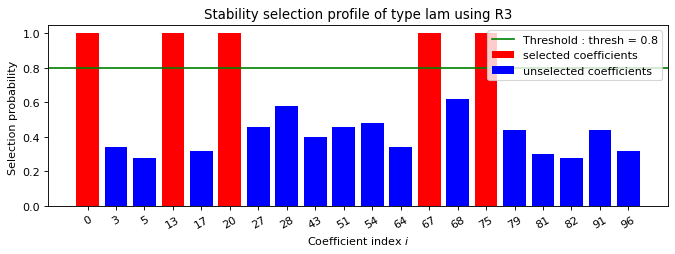

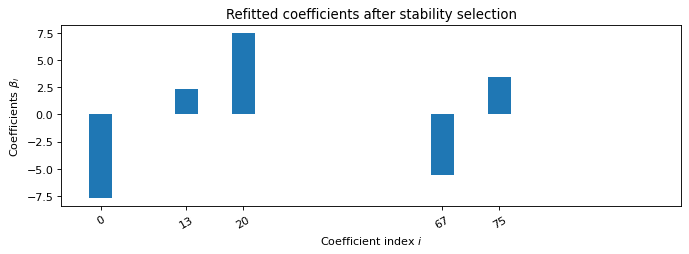


 LAMBDA FIXED : 
   Sigma  =  0.674
   Selected variables :  0    13    20    67    75    
   Running time :  0.006s

 PATH COMPUTATION : 
   Running time :  155.016s

 CROSS VALIDATION : 
   Selected variables :  0    13    20    28    67    75    
   Running time :  0.177s

 STABILITY SELECTION : 
   Selected variables :  0    13    20    67    75    
   Running time :  1.194s



In [25]:
problem1.solve()
print(problem1)
print(problem1.solution)


problem2.solve()
print(problem2)
print(problem2.solution)


problem3.solve()
print(problem3)
print(problem3.solution)


## Reset the numerical methods 

In [26]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '

## R4

In [27]:
problem1.formulation.concomitant = True
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = True
problem3.formulation.classification = False

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R4
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.208
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : DR
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : DR
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



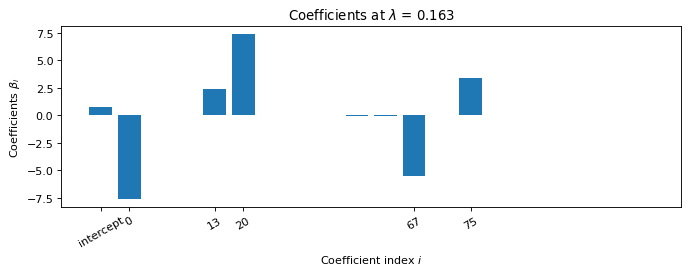

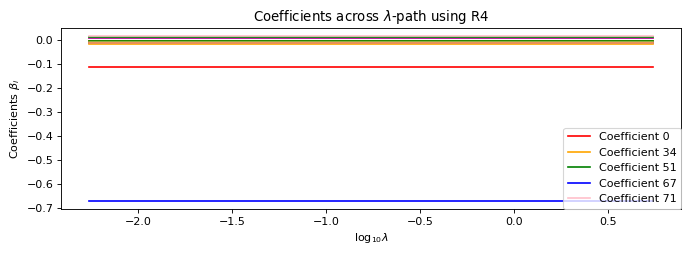

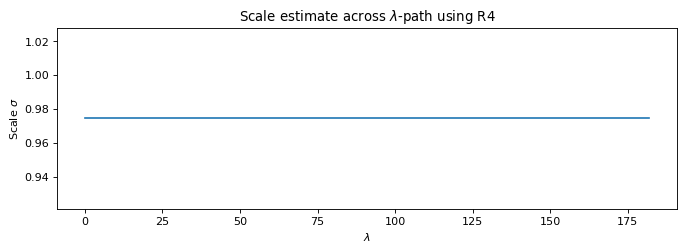

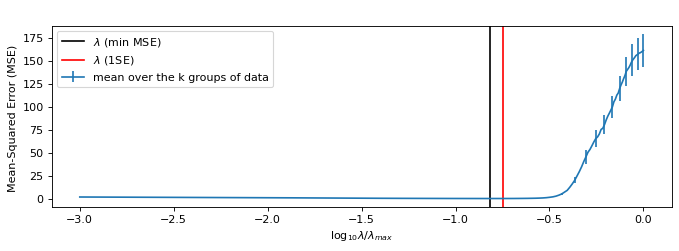

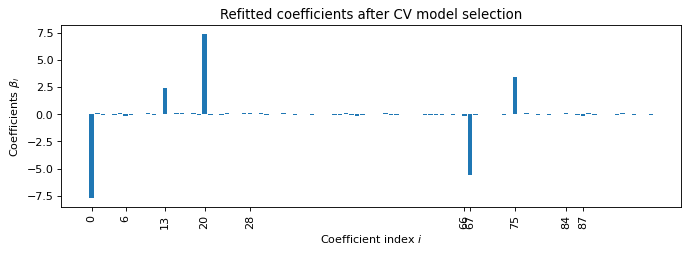

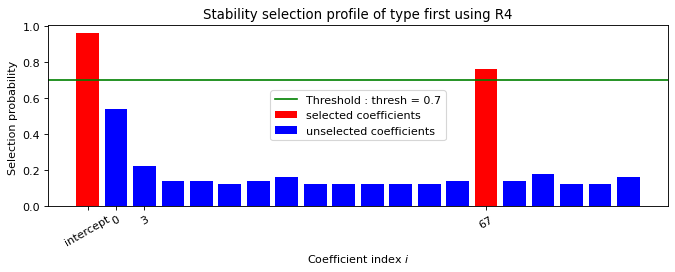

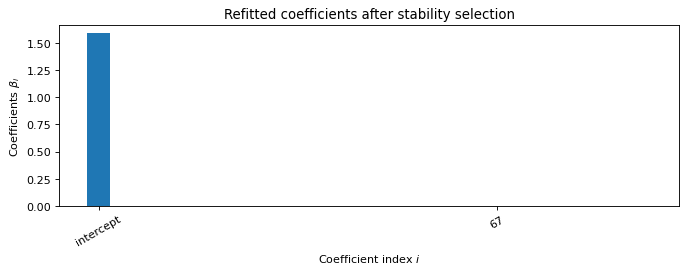


 LAMBDA FIXED : 
   Sigma  =  0.511
   Selected variables :  intercept    0    13    20    67    75    
   Running time :  0.061s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  15.729s

 CROSS VALIDATION : 
 Intercept : 0.5100177737661362
   Selected variables :  0    1    2    3    4    5    6    7    8    9    10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    
   Running time :  273.481s

 STABILITY SELECTION : 
   Selected variables :  intercept    67    
   Running time :  36

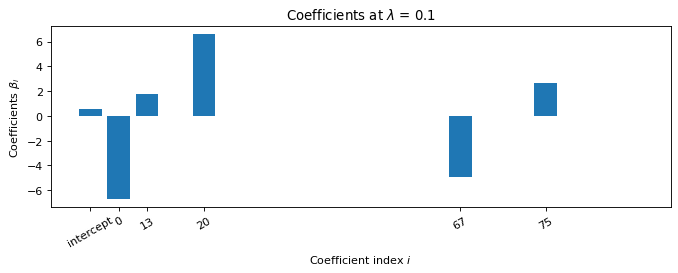

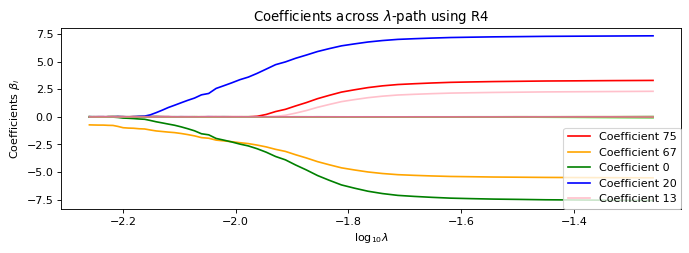

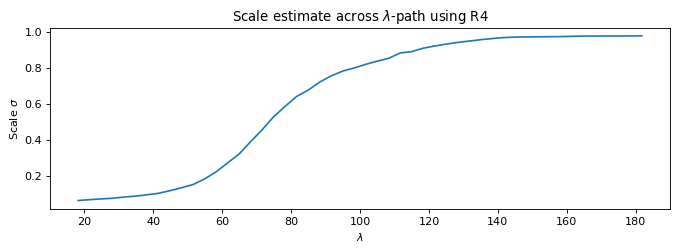

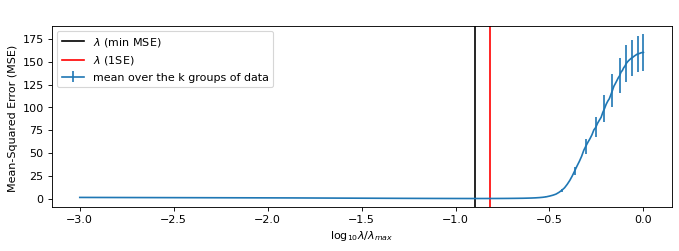

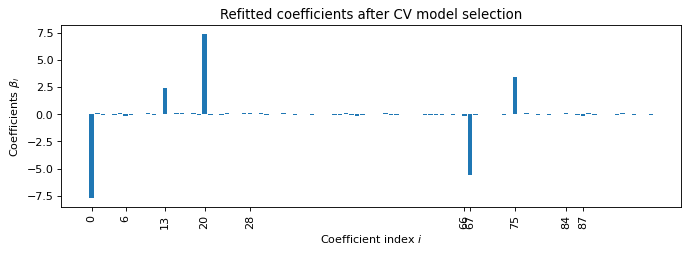

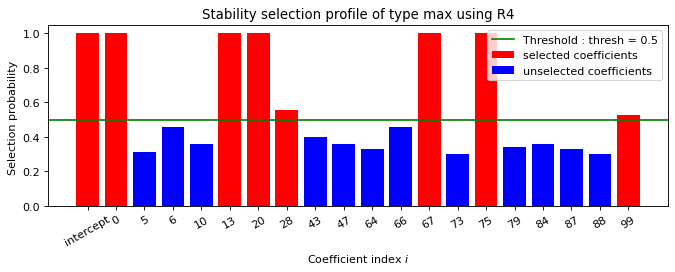

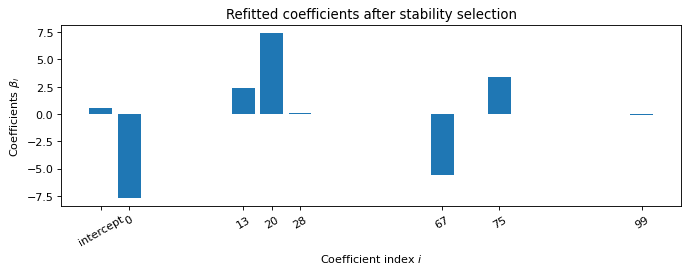


 LAMBDA FIXED : 
   Sigma  =  7.136
   Selected variables :  intercept    0    13    20    67    75    
   Running time :  9.421s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  58.218s

 CROSS VALIDATION : 
 Intercept : 0.5100177737661362
   Selected variables :  0    1    2    3    4    5    6    7    8    9    10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    
   Running time :  437.176s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    13    20    28    67   

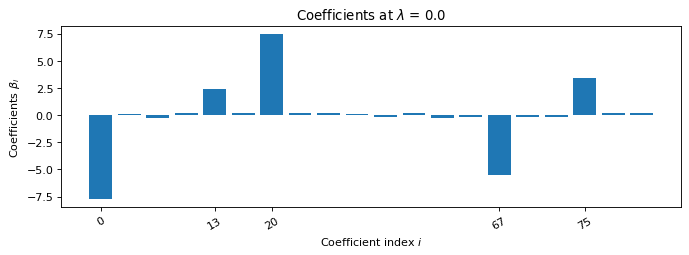

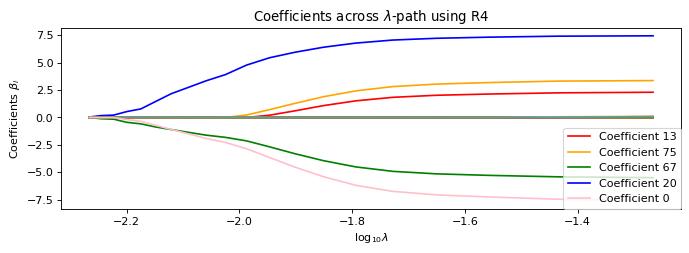

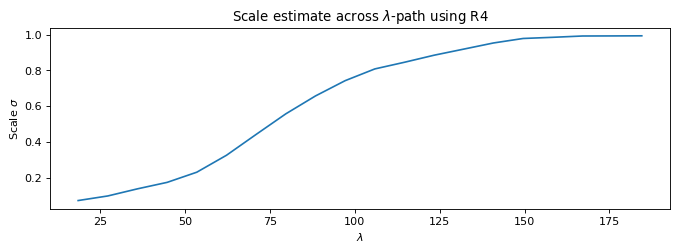

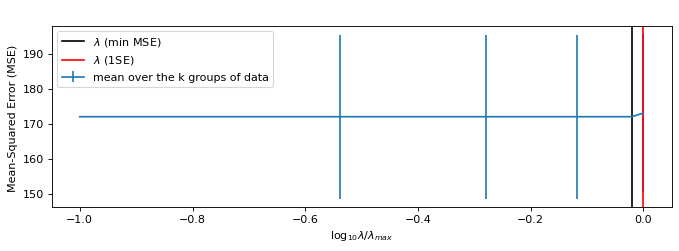

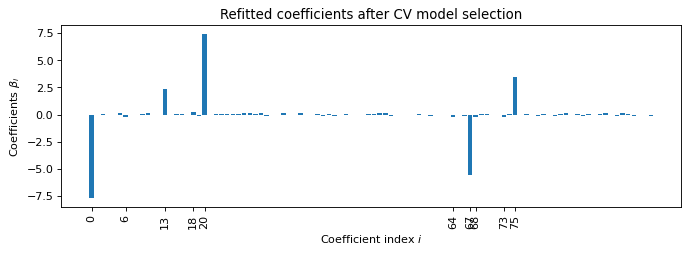

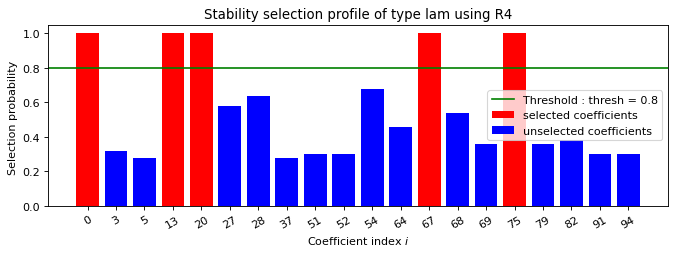

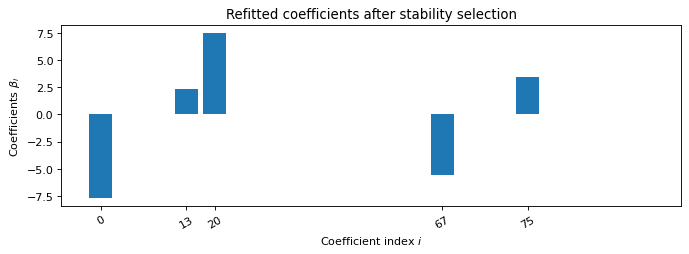


 LAMBDA FIXED : 
   Sigma  =  0.476
   Selected variables :  0    13    20    67    75    
   Running time :  0.012s

 PATH COMPUTATION : 
   Running time :  48.583s

 CROSS VALIDATION : 
   Selected variables :  0    1    2    3    4    5    6    7    8    9    10    11    12    13    14    15    16    17    18    19    20    21    22    23    24    25    26    27    28    29    30    31    32    33    34    35    36    37    38    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    
   Running time :  41.98s

 STABILITY SELECTION : 
   Selected variables :  0    13    20    67    75    
   Running time :  1.463s



In [28]:
problem1.solve()
print(problem1)
print(problem1.solution)


problem2.solve()
print(problem2)
print(problem2.solution)


problem3.solve()
print(problem3)
print(problem3.solution)


## Reset the numerical methods 

In [29]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## C1

In [30]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = True
problem1.data.y = np.sign(problem1.data.y)

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = True
problem2.data.y = np.sign(problem2.data.y)

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = True
problem3.data.y = np.sign(problem3.data.y)

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.208
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



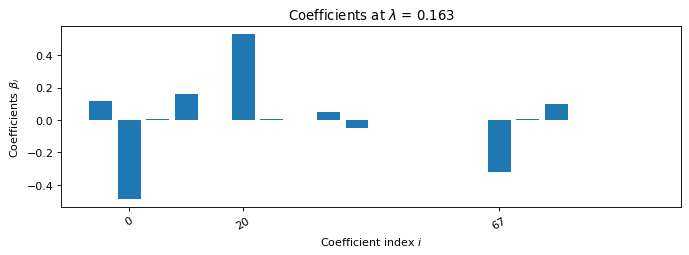

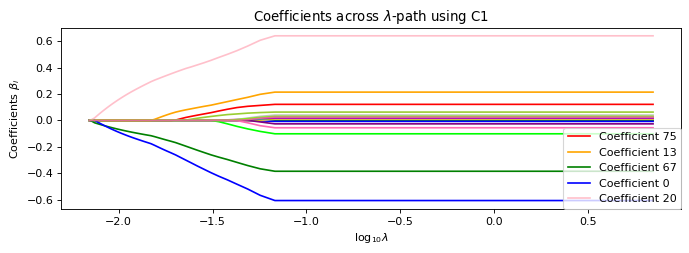

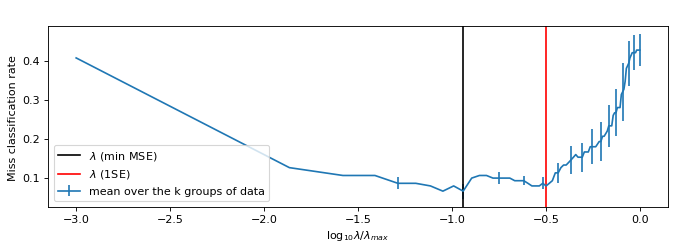

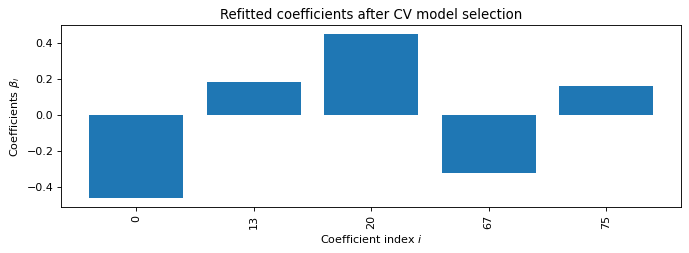

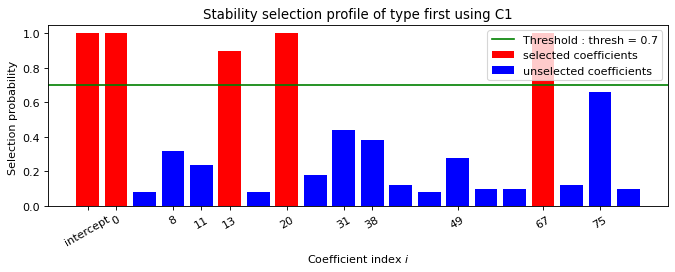

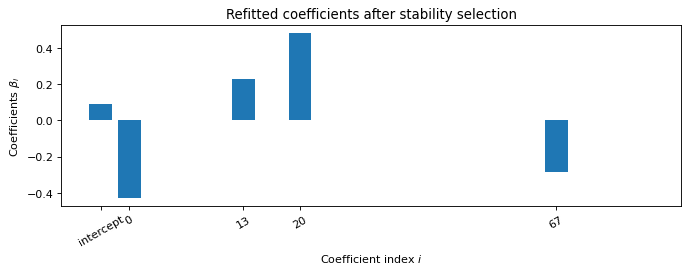


 LAMBDA FIXED : 
   Selected variables :  0    20    67    
   Running time :  0.083s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.132s

 CROSS VALIDATION : 
 Intercept : 0.08772366741496167
   Selected variables :  0    13    20    67    75    
   Running time :  4.189s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    13    20    67    
   Running time :  1.609s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.231
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY

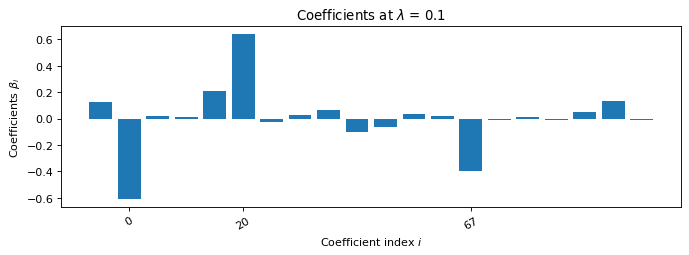

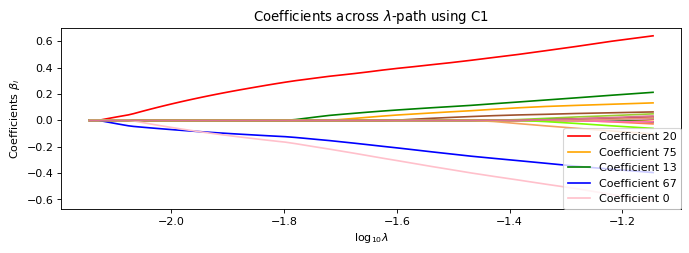

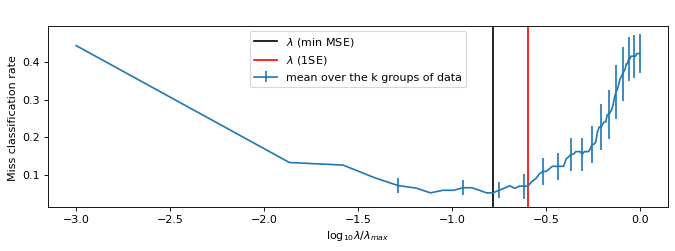

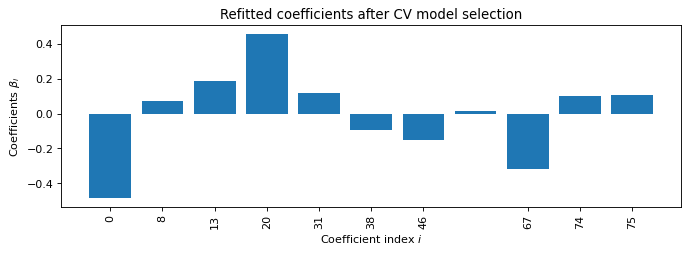

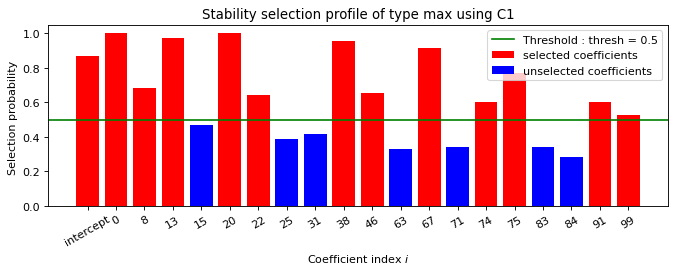

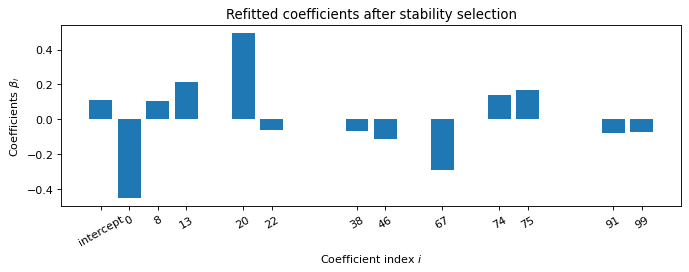


 LAMBDA FIXED : 
   Selected variables :  0    20    67    
   Running time :  0.122s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.13s

 CROSS VALIDATION : 
 Intercept : 0.1346668520951033
   Selected variables :  0    8    13    20    31    38    46    49    67    74    75    
   Running time :  7.243s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    8    13    20    22    38    46    67    74    75    91    99    
   Running time :  26.6s

 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.334
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 3
     lamin = 0.1
     Nlam = 20

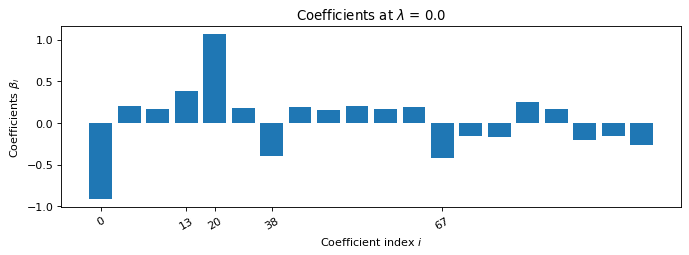

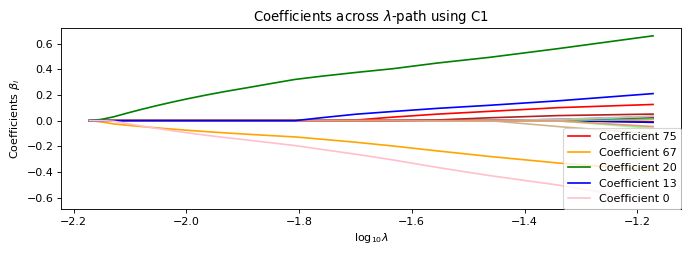

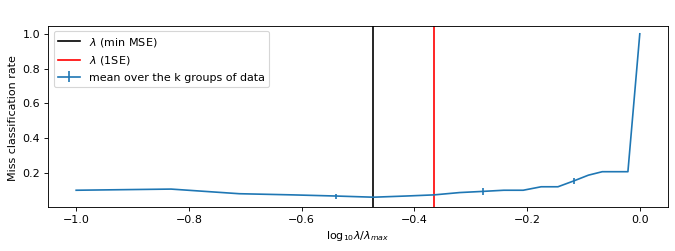

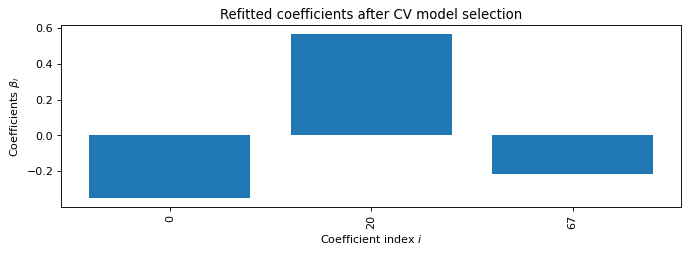

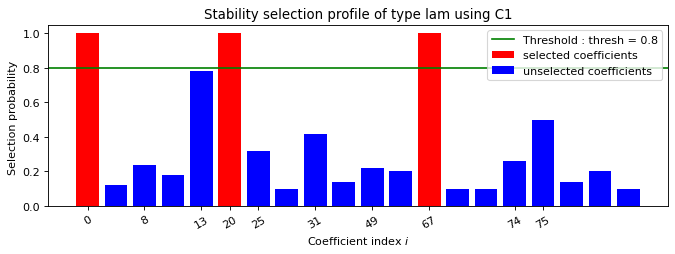

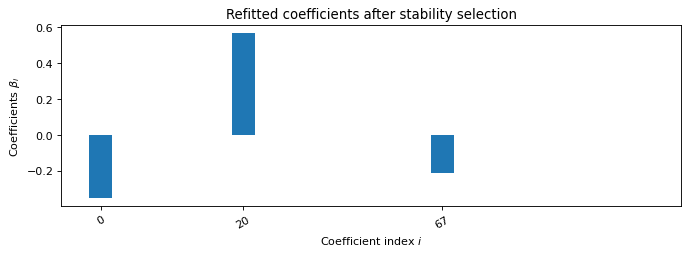


 LAMBDA FIXED : 
   Selected variables :  0    13    20    38    67    
   Running time :  0.567s

 PATH COMPUTATION : 
   Running time :  0.102s

 CROSS VALIDATION : 
   Selected variables :  0    20    67    
   Running time :  0.215s

 STABILITY SELECTION : 
   Selected variables :  0    20    67    
   Running time :  0.88s



In [31]:
problem1.solve()
print(problem1)
#problem1.solution.CV.graphic(se_max = None)
print(problem1.solution)


problem2.solve()
print(problem2)
#problem2.solution.CV.graphic(se_max = None)
print(problem2.solution)


problem3.solve()
print(problem3)
#problem3.solution.CV.graphic(se_max = None)
print(problem3.solution)


## Reset the numerical methods 

In [32]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## C2

In [33]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = True

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = True

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = True

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: C2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.208
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



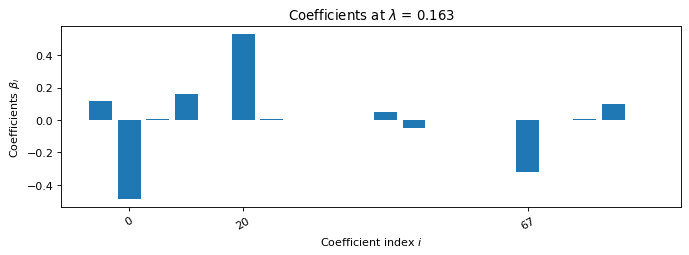

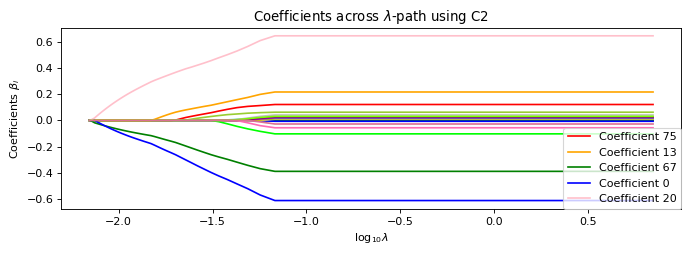

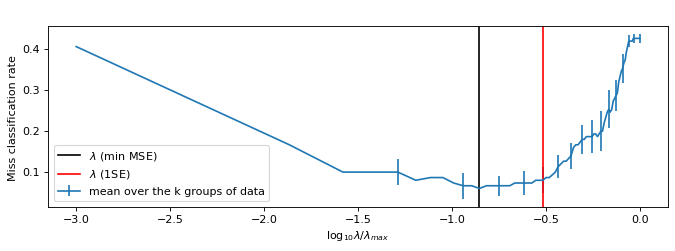

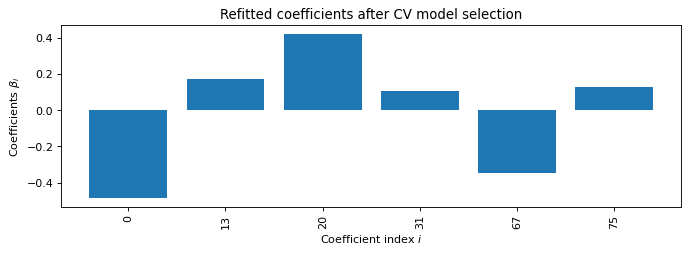

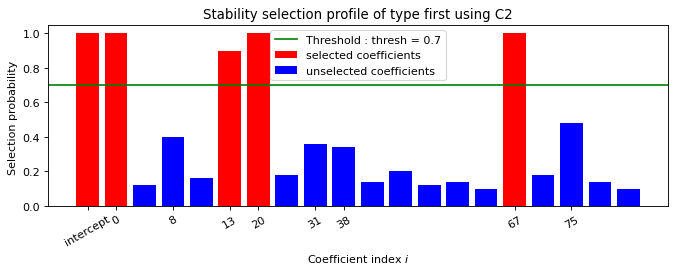

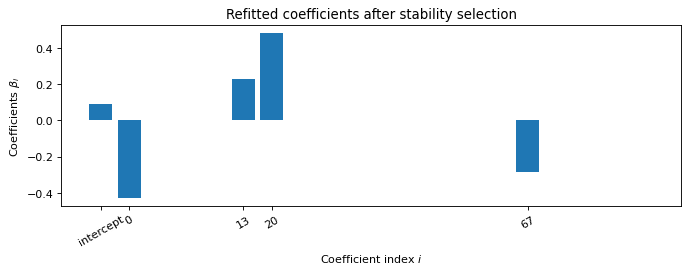


 LAMBDA FIXED : 
   Selected variables :  0    20    67    
   Running time :  0.091s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.154s

 CROSS VALIDATION : 
 Intercept : 0.10463579335157788
   Selected variables :  0    13    20    31    67    75    
   Running time :  6.717s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    13    20    67    
   Running time :  1.799s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: C2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.231
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STA

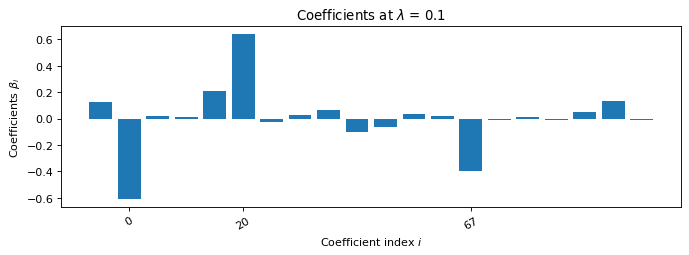

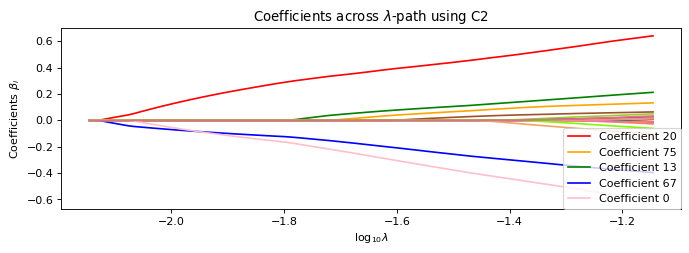

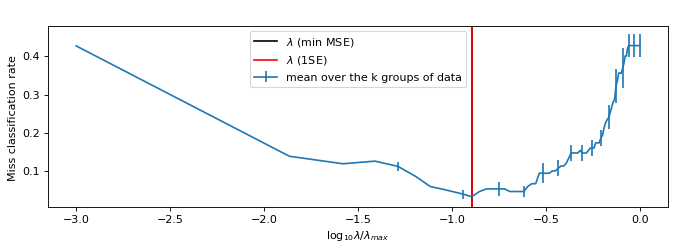

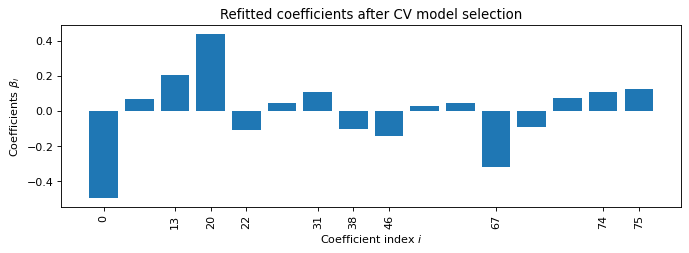

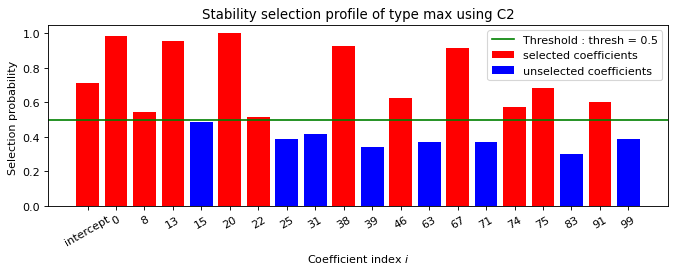

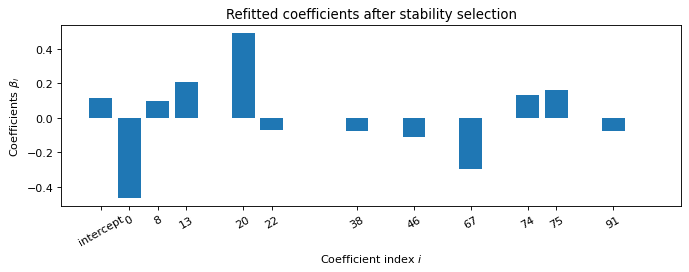


 LAMBDA FIXED : 
   Selected variables :  0    20    67    
   Running time :  0.133s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.139s

 CROSS VALIDATION : 
 Intercept : 0.1389247883496631
   Selected variables :  0    8    13    20    22    25    31    38    46    49    63    67    69    70    74    75    
   Running time :  9.179s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    8    13    20    22    38    46    67    74    75    91    
   Running time :  38.309s

 
 
FORMULATION: C2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.334
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 3
    

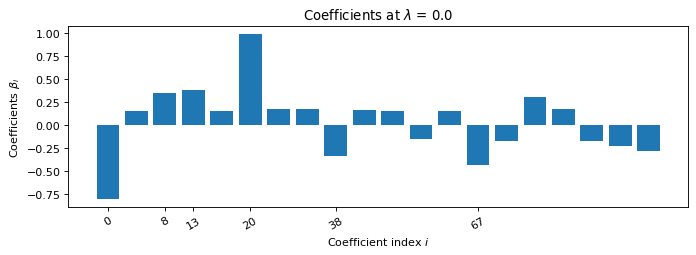

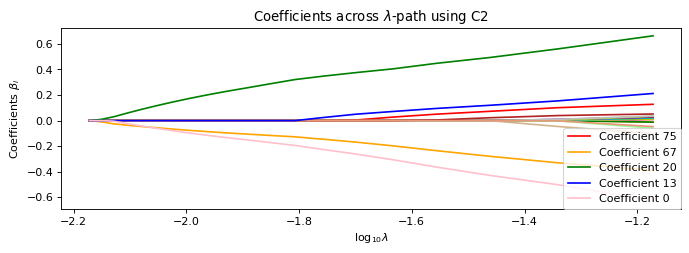

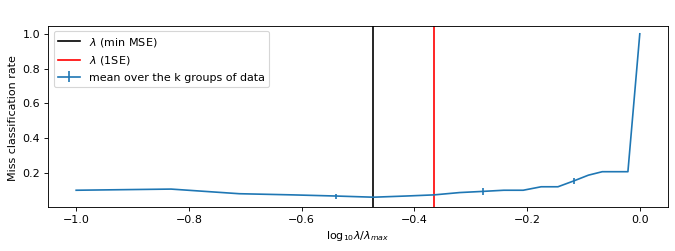

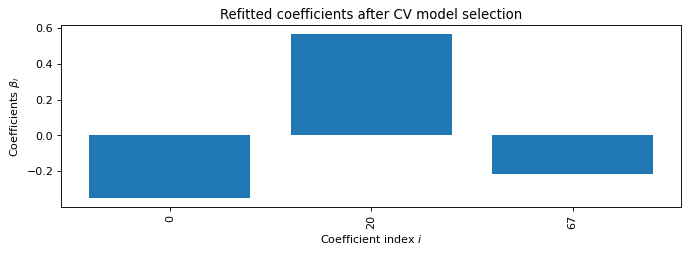

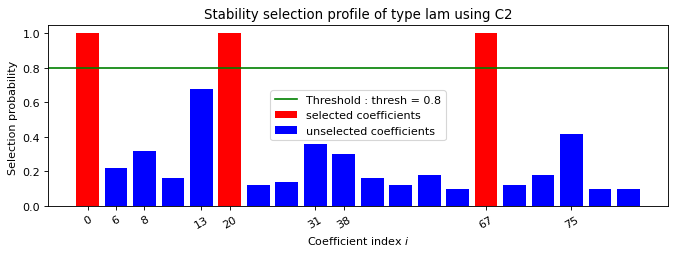

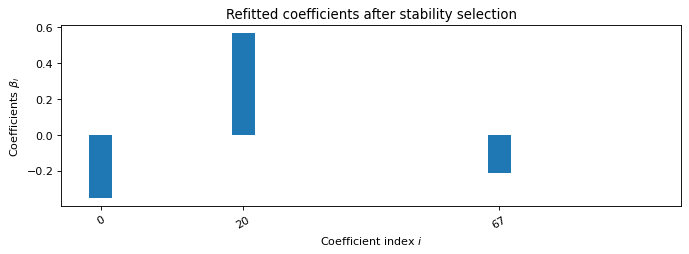


 LAMBDA FIXED : 
   Selected variables :  0    8    13    20    38    67    
   Running time :  0.811s

 PATH COMPUTATION : 
   Running time :  0.12s

 CROSS VALIDATION : 
   Selected variables :  0    20    67    
   Running time :  0.24s

 STABILITY SELECTION : 
   Selected variables :  0    20    67    
   Running time :  0.903s



In [34]:
problem1.solve()
print(problem1)
print(problem1.solution)


problem2.solve()
print(problem2)
print(problem2.solution)


problem3.solve()
print(problem3)
print(problem3.solution)